# Importing libraries

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Loading data right from the source:


In [35]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
data = pd.read_csv('/content/gdrive/My Drive/DV DATASET/coronaCases.csv')
corona_dataset_csv = pd.read_csv('/content/gdrive/My Drive/DV DATASET/covid19_Confirmed_dataset.csv')
world_happiness_report = pd.read_csv("/content/gdrive/My Drive/DV DATASET/worldwide_happiness_report.csv")
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)

data = data[['id','cases']]
# confirmed_df.head()
# recovered_df.head()
# death_df.head()
# country_df.head()

In [3]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# country_df.head()

In [4]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

#Displaying the total stats

In [5]:

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #ffd700; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

#Predicting number of Confirmed cases for today

accuracy 99.918
[74516.52898448]
Prediction - Cases after 779 days:1837.95 Million


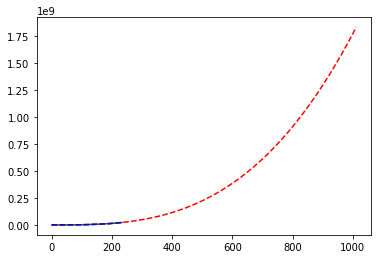

In [6]:
#predicting number of Confirmed cases for today
x = np.array(data['id']).reshape(-1, 1)
y = np.array(data['cases']).reshape(-1, 1)
plt.plot(y,'-g')
#plt.show()
poly= PolynomialFeatures(degree=3)
x = poly.fit_transform(x)

reg= linear_model.LinearRegression()
reg.fit(x,y)
accuracy = reg.score(x,y)
print('accuracy',round(accuracy*100,3))
y0 = reg.predict(x)
print(reg.intercept_)
from datetime import date

today = date.today()

#the id is till march 11
fin_date=date(2020,3,11)
diff=today-fin_date
days = diff.days
print(f'Prediction - Cases after {days} days:',end='')
print(round(int(reg.predict(poly.fit_transform([[234+days]])))/1000000,2),'Million')

x1 = np.array(list(range(1,234+days))).reshape(-1,1)
y1 = reg.predict(poly.fit_transform(x1))
plt.plot(y1,'--r')
plt.plot(y0,'--b')
plt.show()

#Details in descending order

In [7]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: orange'
    g = 'background-color: green'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [8]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

#Worst hit countries

In [9]:
# # plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [10]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();


#Check the details of your country or the World
Enter the name of your country(in capitalized format(e.g. India)) and world for total cases

In [11]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

# 10 worst hit countries - Confirmed cases

In [12]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["orange"], 
    height=500,
    width=800
)

# 10 worst hit countries - Death cases

In [13]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["green"], 
    height=500,
    width=800
)

#Infection Rates

In [14]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
total_cases=corona_dataset_aggregated.sum(axis=1)

In [15]:
from matplotlib.pyplot import figure
countries=list(corona_dataset_aggregated.index)
total_cases=corona_dataset_aggregated.sum(axis=1)
plt.figure(figsize=(100,40),dpi=380)
plt.xticks(rotation=90,fontsize=25)
plt.bar(countries,total_cases)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

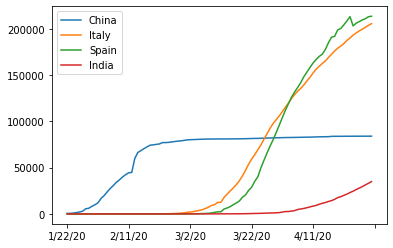

In [16]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
corona_dataset_aggregated.loc['India'].plot()
plt.legend()

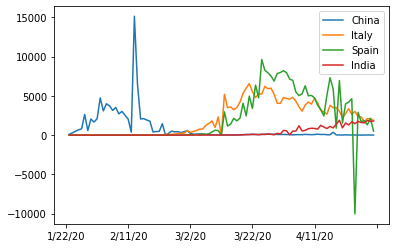

In [17]:
corona_dataset_aggregated.loc['China'].diff().plot()
corona_dataset_aggregated.loc['Italy'].diff().plot()
corona_dataset_aggregated.loc['Spain'].diff().plot()
corona_dataset_aggregated.loc['India'].diff().plot()
plt.legend()

In [18]:
#mean infection rates
countries = list(corona_dataset_aggregated.index)
ave_infection_rates = []
for country in countries :
    ave_infection_rates.append(corona_dataset_aggregated.loc[country].diff().mean())
corona_dataset_aggregated['mean infection rate'] = ave_infection_rates

corona_data = pd.DataFrame(corona_dataset_aggregated['mean infection rate'])
corona_data.head()


,mean infection rate
Country/Region,
Afghanistan,21.929293
Albania,7.808081
Algeria,40.464646
Andorra,7.525253
Angola,0.272727


In [19]:
plt.figure(figsize=(100,40),dpi=380)
plt.xticks(rotation=90,fontsize=25)
plt.bar(countries,ave_infection_rates)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#GDP vs Mean infection rates

In [39]:
data = world_happiness_report.join(corona_data,how="inner")
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,mean infection rate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



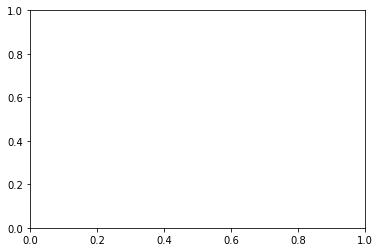

In [38]:
x = data['GDP per capita']
y = data['mean infection rate']
sns.scatterplot(x,y)

# Freedom to make life choices vs Mean infection rates

In [22]:
world_happiness_report.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [23]:
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



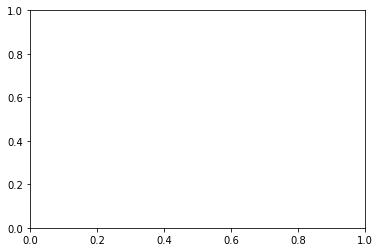

In [24]:
x = data['Freedom to make life choices']
y = data['mean infection rate']
sns.scatterplot(x,np.log(y))

#Covid library

In [41]:
pip install Covid

In [26]:
from covid import Covid

covid = Covid()
covid.get_data()
countries = covid.list_countries()
df=pd.DataFrame(data=covid.get_data())
df.head()

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,184,US,81251637,None,993164,None,40.000000,-100.000000,1651227639000
1,81,India,43072176,None,523753,None,20.593684,78.962880,1651227639000
2,25,Brazil,30418920,None,663464,None,-14.235000,-51.925300,1651227639000
3,64,France,28733434,None,146748,None,46.227600,2.213700,1651227639000
4,68,Germany,24710769,None,135292,None,51.165691,10.451526,1651227639000


#An overlook of Indian Cases

In [27]:
india_cases = covid.get_status_by_country_name("india")
india_cases

{'active': None,
 'confirmed': 43072176,
 'country': 'India',
 'deaths': 523753,
 'id': '81',
 'last_update': 1651227639000,
 'latitude': 20.593684,
 'longitude': 78.96288,
 'recovered': None}

#Cases all over the World

In [28]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="country", locationmode='country names', 
                  color=col, hover_name="country", 
                  title=col, hover_data=[col], color_continuous_scale=pal)

    fig.show()

In [29]:
plot_map(df, 'confirmed', 'matter')
plot_map(df, 'deaths', 'matter')

#Tree Map

In [30]:
def plot_treemap(col):
    fig = px.treemap(df, path=["country"], values=col, height=700,
                 title=col, color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [31]:
plot_treemap('confirmed')
plot_treemap('deaths')